# Single nn.Linear

In [1]:
import torch
import torch.nn as nn # forward하는데 매우 많이 쓸 것임.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'x')

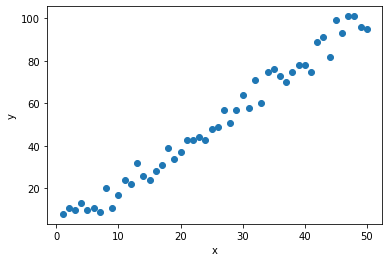

In [2]:

# create data
X = torch.linspace(1,50,50).reshape(-1,1)

# create error data
torch.manual_seed(42)
e = torch.randint(-8,9, (50,1), dtype = torch.float)

# formula
y = 2*X + 1 + e

# plot
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

#### 여기서 문제점이 하나 있는데, X를 만들때 requires_grad = True를 안했다. 이렇게 하면 무슨 문제가 있냐면, y.backward()가 작동하지 않는다. 왜냐하면 토치가 operation을 추적하지 않기 때문에 X와 y의 관계를 모름.

# Linear Model

In [4]:
# Linear Model은 tensorflow에서 Dense라고 생각하면 편하다.

class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = Model(1,1)
print(model)
print('---------------------------------')
print('Weight:', model.linear.weight.item())
print('Bias:', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
---------------------------------
Weight: -0.7670228481292725
Bias: 0.8205388784408569


In [7]:
# 모델이 복잡해지면 아래와같은 방법을 사용하는게 좋다.

for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 -0.7670228481292725
linear.bias 	 0.8205388784408569


# Train
- set : criterion, optimizer

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

n_epochs = 100
losses = []
for i in range(n_epochs):
    

In [ ]:
# Train model
n_epochs = 30
losses = []
for i in range(n_epochs):
    # zero param gradients
    optimizer.zero_grad() # torch는 backward한번 할때마다 gradient를 cumulating함. 그래서 zero함.
    
    # forward
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # keep the loss
    losses.append(loss.item())
    
    #backward
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {i + 1}/{n_epochs}, Loss: {loss.item():.4f}')